# Встроенные датасеты

In [1]:
from sklearn.datasets import *

# regression
boston = load_boston()
diabetes = load_diabetes()

#classification
iris = load_iris()
breast = load_breast_cancer()
wine = load_wine()
digits = load_digits()

print(digits.DESCR)
# print(digits.feature_names)
print(digits.target)
print(digits.data)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [2]:
X = digits.data
y = digits.target

In [3]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=10)

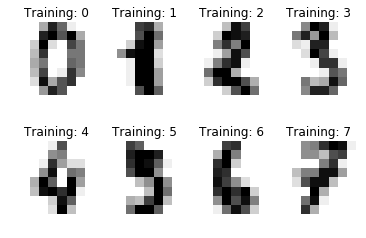

In [10]:
import matplotlib.pyplot as plt
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

# Генераторы датасетов

In [4]:
# Generate isotropic Gaussian blobs for clustering.
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=3, n_samples=100, n_features=2)

In [20]:
# Generate a random n-class classification problem.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100)

In [16]:
# Make a large circle containing a smaller circle in 2d.
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100)

In [18]:
# Make two interleaving half circles
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100)

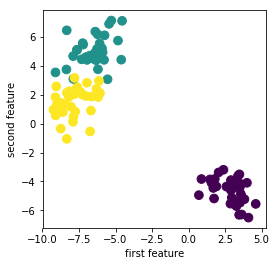

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 4, 4
plt.scatter(X[:, 0], X[:, 1], c=y, s=75)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()

# Классификация

In [5]:
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [ ]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

In [6]:
from sklearn import metrics

pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, pred))
print(metrics.f1_score(y_test, pred, average = 'macro'))
print(metrics.precision_score(y_test, pred, average = 'macro'))
print(metrics.recall_score(y_test, pred, average = 'macro'))

0.837037037037
0.839463016876
0.839949685517
0.841937143976


/home/com/miniconda2/envs/py36/lib/python3.6/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


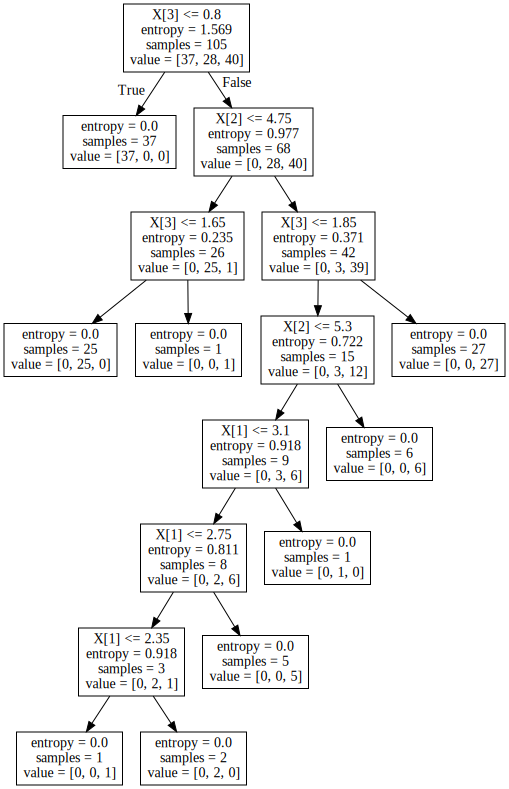

In [11]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(clf) 
# Source(export_graphviz(clf, out_file=None, feature_names=digits.feature_names))
Source(export_graphviz(clf, out_file=None))

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['cyan', 'pink'])
    if line:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

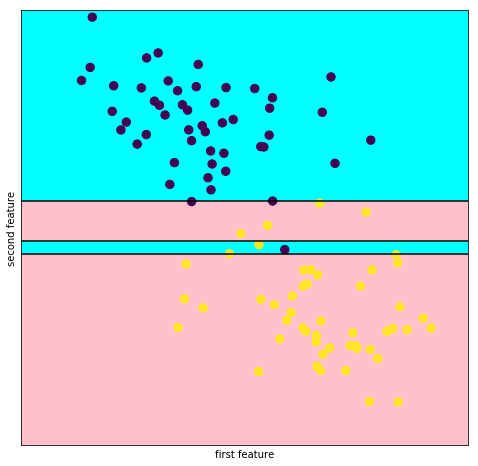

In [104]:
plt.rcParams['figure.figsize'] = 8, 8
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(clf, X_train, fill=True, line=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
plt.show()

# Регрессия

In [122]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

In [124]:
print(pred)
print(y_test)

[ 24.8  50.   16.6  21.1  27.5  13.8  20.   17.9  29.8  17.2  17.4  22.5
  22.5  14.1  21.   23.2  10.2   5.   19.5  15.   50.   14.8  21.2  17.1
  20.3  18.2  24.3  20.   22.3  22.2  23.1  14.4  28.1  20.8  23.1  22.7
  23.4  21.8  12.5  17.5  43.8  37.9  14.2  24.6  23.9  20.3  27.1  23.6
  24.7  13.9  36.1  13.1  15.2  12.7  26.4  34.9  10.4  23.9  17.3  29.9
  20.4  22.2  27.1  27.   32.4  20.1  16.1  19.8  24.8  12.6  20.1  24.7
  21.4  23.2  37.3  29.8  50.   18.5  14.2   7.4  17.3  13.9  50.   33.4
  39.8  14.9  33.8  19.1  20.3  18.2  37.9  24.6  46.   21.   20.3  31.
  20.1  33.4  18.7  23.2  15.2   7.2  32.    8.4  21.4  13.3  24.1  18.7
  18.3  43.8  29.9  20.4  20.6  50.   24.   20.   25.   14.5  14.5  30.3
  24.   11.8  18.7  50.   24.6  14.2  16.8  50.   46.   23.1  37.   23.1
  14.4  16.6  11.8  22.6  37.   20.   24.6  24.6  21.2  21.7  22.6  28.1
  20.   28.1  20.3  15.   28.5   5.   17.8  12.5]
[ 22.   48.8  23.1  11.9  22.8  13.8  19.3  16.3  23.3  17.6  18.1  21.2
  

# Кластеризация

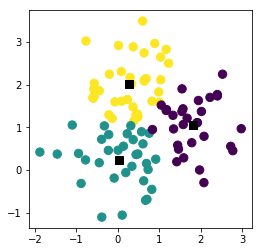

In [114]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=70)

mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=50, c='black', marker='s')
plt.show()

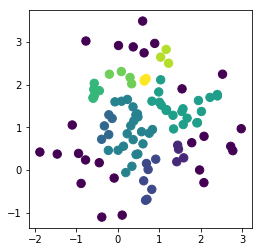

In [118]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=3)
labels = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=70)
plt.show()